# 随机森林学习

In [ ]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 导入数据集
from sklearn.datasets import load_wine

# 导入数据
wine = load_wine()

In [ ]:
wine.data

In [ ]:
wine.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

# 创建实例
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier()

# 拟合模型
clf = clf.fit(X_train, y_train)
rfc = rfc.fit(X_train, y_train)

# 计算准确率
score_c = clf.score(X_test, y_test)
score_r = rfc.score(X_test, y_test)

# 输出结果
print("Single Tree:{}".format(score_c)
      , "Random Forest:{}".format(score_r))

In [ ]:
# 交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), rfc_s, label="RandomForest")
plt.plot(range(1, 11), clf_s, label="Decision Tree")
plt.legend()

In [ ]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1, 11), rfc_l, label="Random Forest")
plt.plot(range(1, 11), clf_l, label="Decision Tree")
plt.legend()

In [ ]:
# 绘制n_estimators的学习曲线
superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)
    
print(max(superpa), superpa.index(max(superpa)))

plt.figure(figsize=[20, 5])
plt.plot(range(1, 201), superpa)
plt.show()

In [ ]:
# 查看随机森林的随机性
rfc = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=888)
rfc = rfc.fit(wine.data, wine.target)

rfc.estimators_

In [ ]:
# 袋外样本估计
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_

In [ ]:
pd.DataFrame(rfc.feature_importances_, index=wine.feature_names, columns=["importance"]).sort_values(by="importance", ascending=False)

In [ ]:
# 获取每个叶子节点的索引
rfc.apply(wine.data)

In [ ]:
# 获取每个测试样本所在的叶子节点的索引
rfc.apply(X_test)

In [ ]:
# 预测每个测试样本的标签
rfc.predict(X_test)

In [ ]:
# 获取每个测试样本的标签的概率
rfc.predict_proba(X_test)

In [ ]:
# 导入加利福尼亚房价数据集
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
data = fetch_california_housing()
data.data

In [ ]:
X = data.data
y = data.target

In [ ]:
X

In [ ]:
y

In [ ]:
reg = RandomForestRegressor(n_estimators=100, random_state=888)
cross_val_score(reg, X, y, cv=10, scoring="neg_mean_squared_error").mean()

## 预测缺失数据

In [1]:
# 导入常用包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
dataset.target.shape

(20640,)

In [6]:
dataset.data.shape

(20640, 8)

In [7]:
X_full, y_full = dataset.data, dataset.target

In [8]:
# 样本个数
n_samples = X_full.shape[0]
n_samples

20640

In [9]:
# 特征个数
n_features = X_full.shape[1]
n_features

8

In [10]:
# 人为生成缺失值
# 假设缺失的比例为0.5

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
n_missing_samples

82560

In [11]:
# 确定缺失列的索引
missing_features = rng.randint(0, n_features, n_missing_samples)
len(missing_features)

82560

In [12]:
# 确定缺失行的索引
missing_samples = rng.randint(0, n_samples, n_missing_samples)
len(missing_samples)

82560

In [13]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [14]:
# 将缺失值赋值为np.nan
X_missing[missing_samples, missing_features] = np.nan

In [15]:
X_missing = pd.DataFrame(X_missing)
X_missing

,0,1,2,3,4,5,6,7
0,8.3252,NaN,6.984127,NaN,NaN,2.555556,37.88,NaN
1,8.3014,NaN,NaN,0.971880,2401.0,2.109842,NaN,-122.22
2,NaN,NaN,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,NaN,5.817352,1.073059,NaN,2.547945,37.85,-122.25
4,3.8462,NaN,NaN,1.081081,NaN,NaN,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,NaN,2.560606,NaN,NaN
20636,NaN,18.0,NaN,1.315789,356.0,3.122807,NaN,-121.21
20637,NaN,17.0,5.205543,1.120092,1007.0,2.325635,39.43,NaN
20638,1.8672,NaN,NaN,1.171920,741.0,NaN,39.43,-121.32


In [16]:
from sklearn.impute import SimpleImputer

# 写为循环操作
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

for i in sortindex:
    df = X_missing_reg.copy()
    fillc = df.iloc[:, i]
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1)
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    
    # 划分训练集与测试集
    y_train = fillc[fillc.notnull()]
    y_test = fillc[fillc.isnull()]
    X_train = df_0[y_train.index, :]
    X_test = df_0[y_test.index, :]
    
    # 拟合随机森林模型并预测
    rfc = RandomForestRegressor(n_estimators=100)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    
    # 填补缺失值
    X_missing_reg.iloc[X_missing_reg.iloc[:, i].isnull(), i] = y_predict

In [ ]:
X_missing_reg

In [18]:
from sklearn.impute import SimpleImputer

# 用均数代替缺失值
X_missing_mean = X_missing.copy()

X_missing_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_missing_mean)

X_missing_mean = pd.DataFrame(X_missing_mean)

X_missing_mean

,0,1,2,3,4,5,6,7
0,8.325200,28.616222,6.984127,1.100913,1419.802875,2.555556,37.880000,-119.57379
1,8.301400,28.616222,5.433694,0.971880,2401.000000,2.109842,35.642578,-122.22000
2,3.850569,28.616222,8.288136,1.073446,496.000000,2.802260,37.850000,-122.24000
3,5.643100,28.616222,5.817352,1.073059,1419.802875,2.547945,37.850000,-122.25000
4,3.846200,28.616222,5.433694,1.081081,1419.802875,3.087606,37.850000,-122.25000
...,...,...,...,...,...,...,...,...
20635,1.560300,25.000000,5.045455,1.133333,1419.802875,2.560606,35.642578,-119.57379
20636,3.850569,18.000000,5.433694,1.315789,356.000000,3.122807,35.642578,-121.21000
20637,3.850569,17.000000,5.205543,1.120092,1007.000000,2.325635,39.430000,-119.57379
20638,1.867200,28.616222,5.433694,1.171920,741.000000,3.087606,39.430000,-121.32000


In [19]:
# 用0代替缺失值
X_missing_0 = X_missing.copy()

X_missing_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(X_missing_0)

X_missing_0 = pd.DataFrame(X_missing_0)

X_missing_0

,0,1,2,3,4,5,6,7
0,8.3252,0.0,6.984127,0.000000,0.0,2.555556,37.88,0.00
1,8.3014,0.0,0.000000,0.971880,2401.0,2.109842,0.00,-122.22
2,0.0000,0.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,0.0,5.817352,1.073059,0.0,2.547945,37.85,-122.25
4,3.8462,0.0,0.000000,1.081081,0.0,0.000000,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.0,2.560606,0.00,0.00
20636,0.0000,18.0,0.000000,1.315789,356.0,3.122807,0.00,-121.21
20637,0.0000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.00
20638,1.8672,0.0,0.000000,1.171920,741.0,0.000000,39.43,-121.32


In [20]:
# 对四种填补方式进行建模
X = [X_full, X_missing_mean, X_missing_0, X_missing_reg]
mse = []
std = []

for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator, x, y_full, scoring="neg_mean_squared_error", cv=5).mean()
    mse.append(scores * -1)
    
mse

[0.42484059219479614,
 0.8190618613553055,
 0.8430324785271944,
 0.2652370167462993]

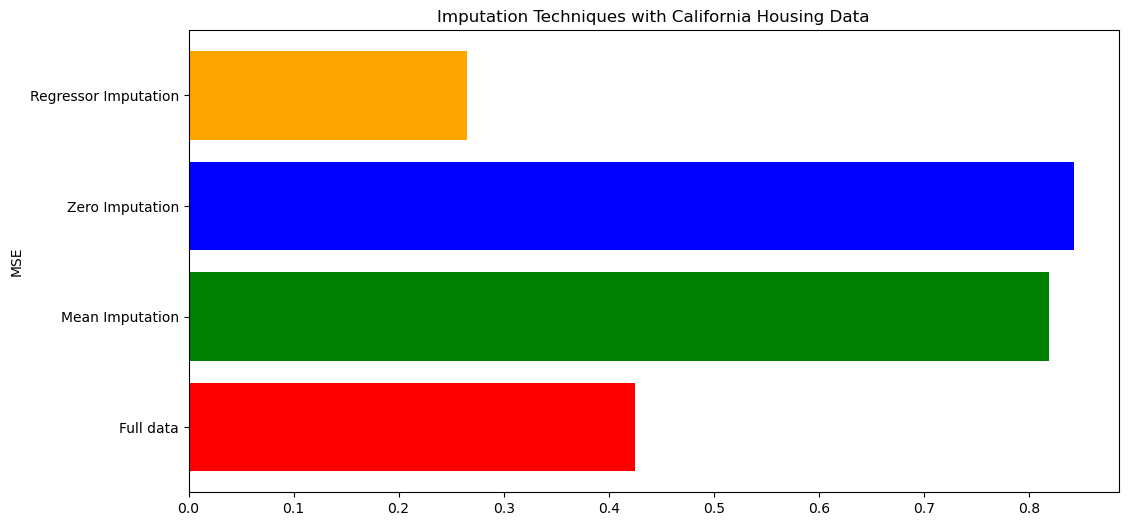

In [22]:
# 绘制图形
x_labels = ['Full data', 'Mean Imputation', 'Zero Imputation', 'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=[12, 6])

for i in range(len(mse)):
    plt.barh(x_labels[i], mse[i], color=colors[i])
    
plt.ylabel('MSE')
plt.title('Imputation Techniques with California Housing Data')

plt.show()

## 乳腺癌数据集

In [24]:
# 导入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
# 未调参
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()

score_pre

0.9648809523809524

In [28]:
# 画模型关于n_estimators的学习曲线
scorel = []

for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

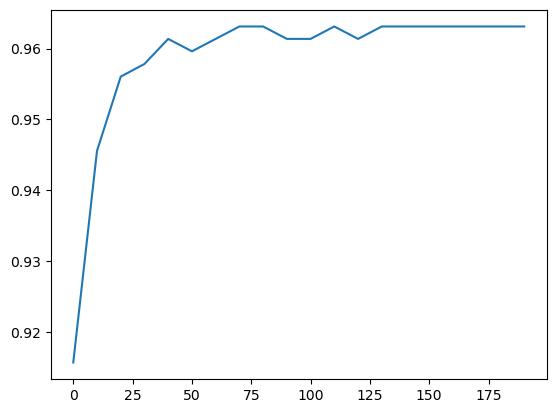

In [29]:
# 绘图

plt.figure()

plt.plot(range(0, 200, 10), scorel)

In [30]:
np.argmax(scorel)

7

0.9666353383458647 13


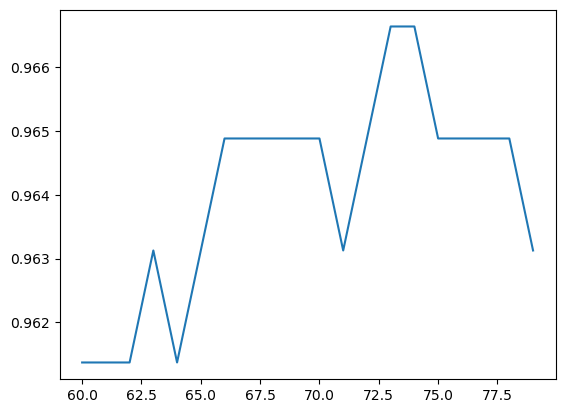

In [31]:
# 画模型关于n_estimators的学习曲线
scorel = []

for i in range(60, 80):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

print(max(scorel), (scorel.index(max(scorel))))
plt.plot(range(60, 80), scorel)
plt.show()

In [32]:
# 对max_depth进行调参

param_grad = {"max_depth":np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=74,
                             random_state=90)

GS = GridSearchCV(rfc, param_grid=param_grad, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=74, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [33]:
GS.best_params_

{'max_depth': 7}

In [34]:
GS.best_score_

0.9666353383458647

In [38]:
# 调节max_feature
param_grad = {"max_features":np.arange(5, 30, 1)}

rfc = RandomForestClassifier(n_estimators=74,
                             random_state=90)

GS = GridSearchCV(rfc, param_grid=param_grad, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=74, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [36]:
GS.best_params_

{'max_depth': 7}

In [37]:
GS.best_score_

0.9666353383458647

## 泰坦尼克号数据调参

In [39]:
# 导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# 导入数据集data.csv
data = pd.read_csv("data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
X = data.iloc[:, data.columns != "Survived"]
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
y = data.iloc[:, data.columns == "Survived"]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1
